In [1]:
import pandas as pd
import numpy as np
import h5py
import os
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
print("successfully imported required libraries")

C:\Users\kaush\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


successfully imported required libraries


In [2]:
import tensorflow as tf
from tensorflow.keras import backend as K

# recall 
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# precision
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#f1 score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
def dice_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.math.sigmoid(y_pred)
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return 1 - numerator / denominator
  
def custom_loss_function(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)

In [3]:
from tensorflow import keras
model = keras.models.load_model("model_save.h5", custom_objects={'f1_m':f1_m, 'precision_m':precision_m, 'recall_m':recall_m , 'dice_loss':dice_loss,'custom_loss_function':custom_loss_function })

In [4]:
import os
print(os.getcwd())
os.chdir("generated_data")
print(os.getcwd())

C:\Users\kaush\Desktop\Major_Project
C:\Users\kaush\Desktop\Major_Project\generated_data


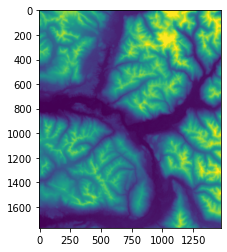

In [5]:
dem = mpimg.imread("mydem.tif")
plt.imshow(dem)

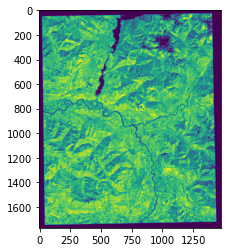

In [6]:
ndvi = mpimg.imread("myndvi.tif")
plt.imshow(ndvi)

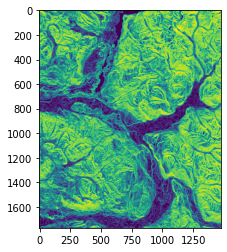

In [7]:
slope = mpimg.imread("myslope.tif")
plt.imshow(slope)

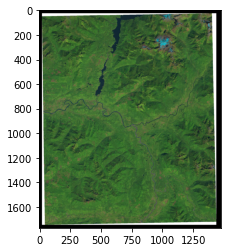

In [8]:
rgb = mpimg.imread("rgb.tif")
plt.imshow(rgb)

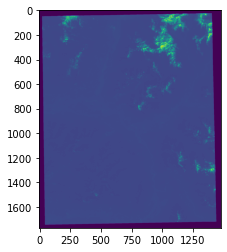

In [9]:
aerosol = mpimg.imread("aerosol.tif")
plt.imshow(aerosol)

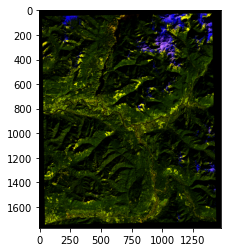

In [10]:
geology = mpimg.imread("geology.tif")
plt.imshow(geology[:,:,0:3])

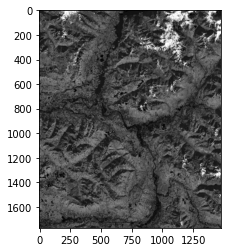

In [11]:
moisture = mpimg.imread("moisture.png")
plt.imshow(moisture[:,:,0:3])

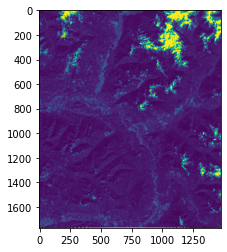

In [12]:
nir = mpimg.imread("nir.png")
plt.imshow(nir[:,:,0])
#a = cv2.imread("NIR.tif")
#b = cv2.cvtColor(a , cv2.COLOR_BGR2RGB)
#plt.imshow(b)

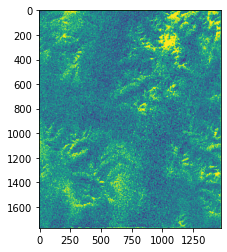

In [13]:
watervapour = mpimg.imread("watervapour.png")
plt.imshow(watervapour[:,:,2])

In [14]:
print("dem shape",dem.shape)
print("slope shape",slope.shape)
print("ndvi shape",ndvi.shape)
print("rgb shape",rgb.shape)
print("aerosol shape",aerosol.shape)
print("geology shape",geology[:,:,0:3].shape)
print("moisture shape",moisture[:,:,0:3].shape)
print("nir shape",nir[:,:,0].shape)
print("watervapour shape",watervapour[:,:,0].shape)

dem shape (1770, 1475)
slope shape (1770, 1475)
ndvi shape (1770, 1476)
rgb shape (1770, 1476, 3)
aerosol shape (1771, 1477)
geology shape (1771, 1477, 3)
moisture shape (1770, 1476, 3)
nir shape (1770, 1476)
watervapour shape (1770, 1476)


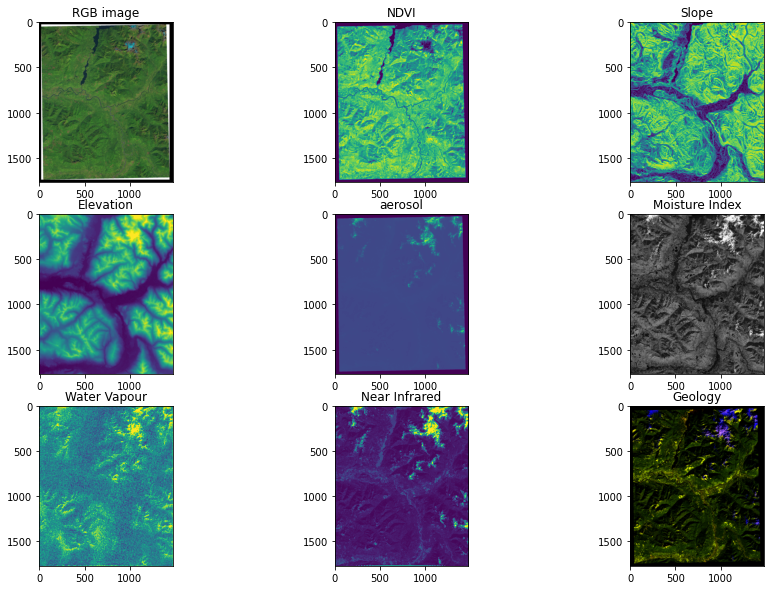

In [15]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(15,10))
ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("aerosol")
ax6.set_title("Moisture Index")
ax7.set_title("Water Vapour")
ax8.set_title("Near Infrared")
ax9.set_title("Geology")    

ax1.imshow(rgb)
ax2.imshow(ndvi)
ax3.imshow(slope)
ax4.imshow(dem)
ax5.imshow(aerosol)
ax6.imshow(moisture[:,:,0:3])
ax7.imshow(watervapour[:,:,0])
ax8.imshow(nir[:,:,0])
ax9.imshow(geology[:,:,0:3])

In [16]:
moisture1 = moisture[:,:,0]
geology1 = geology[:,:,0:3]
watervapour1 = watervapour[:,:,0]
nir1 = nir[:,:,2]

dem shape (128, 128)
slope shape (128, 128)
ndvi shape (128, 128)
rgb shape (128, 128, 3)
aerosol shape (128, 128)
geology shape (128, 128, 3)
moisture shape (128, 128)
nir shape (128, 128)
watervapour shape (128, 128)


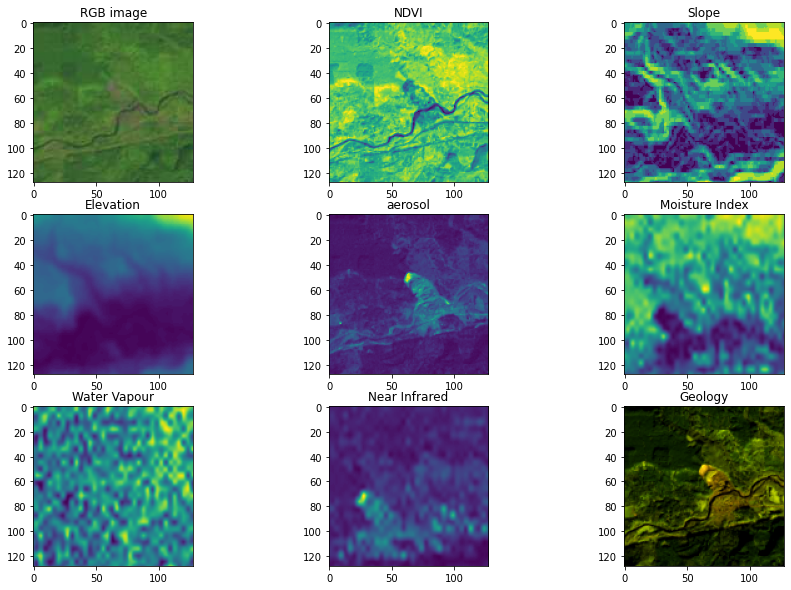

In [17]:
dem1 = dem[1600:1728 , 160:288]
rgb1 = rgb[1600:1728 , 160:288]
slope1 = slope[1600:1728 , 160:288]
ndvi1 = ndvi[1600:1728 , 160:288]
aerosol1 = aerosol[1600:1728 , 160:288]
moisture2 = moisture1[1600:1728 , 160:288]
geology2 = geology1[1600:1728 , 160:288]
nir2 = nir1[1600:1728 , 160:288]
watervapour2 = watervapour1[1600:1728 , 160:288]


print("dem shape",dem1.shape)
print("slope shape",slope1.shape)
print("ndvi shape",ndvi1.shape)
print("rgb shape",rgb1.shape)
print("aerosol shape",aerosol1.shape)
print("geology shape",geology2.shape)
print("moisture shape",moisture2.shape)
print("nir shape",nir2.shape)
print("watervapour shape",watervapour2.shape)

fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(15,10))
ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("aerosol")
ax6.set_title("Moisture Index")
ax7.set_title("Water Vapour")
ax8.set_title("Near Infrared")
ax9.set_title("Geology")

ax1.imshow(rgb1)
ax2.imshow(ndvi1)
ax3.imshow(slope1)
ax4.imshow(dem1)
ax5.imshow(aerosol1)
ax6.imshow(moisture2)
ax7.imshow(watervapour2)
ax8.imshow(nir2)
ax9.imshow(geology2)

In [18]:
res = np.zeros((1, 128, 128, 13))

mid_rgb = rgb1.max() / 2.0
mid_slope = slope1.max() / 2.0
mid_elevation = dem1.max() / 2.0
mid_aerosol = aerosol1.max() / 2.0
mid_watervapour = watervapour2 / 2.0
mid_nir = nir2 / 2.0
pred_img11 = mpimg.imread("a.jpg")
mid_geology = geology2.max() / 2.0
mid_moisture = moisture.max() / 2.0
            
          
# final array
res[0, :, :, 0] = 1 - rgb1[:, :, 2] / mid_rgb #RED
res[0, :, :, 1] = 1 - rgb1[:, :, 1] / mid_rgb #GREEN
res[0, :, :, 2] = 1 - rgb1[:, :, 0] / mid_rgb #BLUE
res[0, :, :, 3] = ndvi1 #NDVI
res[0, :, :, 4] = 1- slope1 / mid_slope #SLOPE
res[0, :, :, 5] = 1 - dem1 / mid_elevation #ELEVATION
            
res[0, :, :, 6] = 1 - aerosol1 / mid_aerosol #Aerosol
res[0, :, :, 7] = 1 - moisture2 / mid_moisture#Moisture
res[0, :, :, 8] = 1 - watervapour2 / mid_watervapour #Water Vapour
res[0, :, :, 9] = 1 - nir2 / mid_nir #Near Infrared
res[0, :, :, 10] = 1 - geology2[:,:,2] / mid_geology #Geology
res[0, :, :, 11] = 1 - geology2[:,:,1] / mid_geology #Geology
res[0, :, :, 12] = 1 - geology2[:,:,0] / mid_geology #Geology
print(res.shape)

(1, 128, 128, 13)


(1, 128, 128, 1)


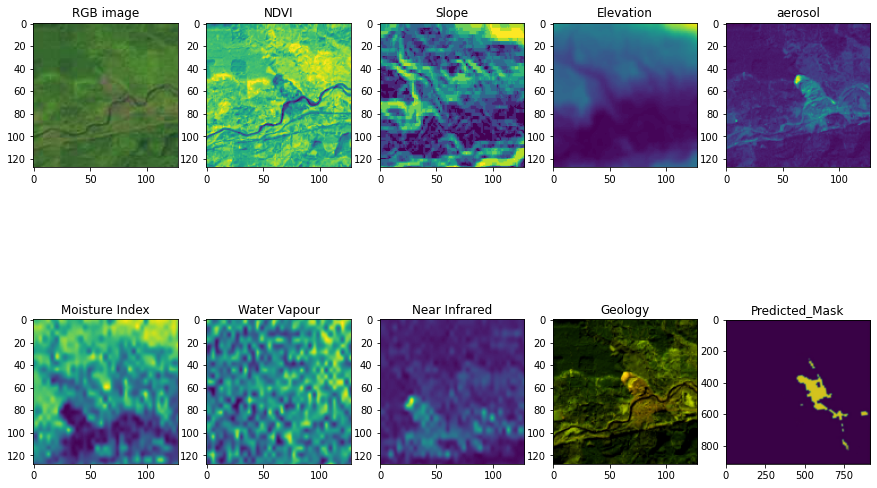

In [19]:
threshold = 0.5
pred_img = model.predict(res)
pred_img = (pred_img > threshold).astype(np.uint8)
print(pred_img.shape)


fig,( (ax1,ax2, ax3, ax4, ax5),(ax6,ax7,ax8,ax9,ax10) )= plt.subplots(2,5,figsize=(15,10))
ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("aerosol")
ax6.set_title("Moisture Index")
ax7.set_title("Water Vapour")
ax8.set_title("Near Infrared")
ax9.set_title("Geology")    
ax10.set_title("Predicted_Mask")

ax1.imshow(rgb1)
ax2.imshow(ndvi1)
ax3.imshow(slope1)
ax4.imshow(dem1)
ax5.imshow(aerosol1)
ax6.imshow(moisture2)
ax7.imshow(watervapour2)
ax8.imshow(nir2)
ax9.imshow(geology2)
ax10.imshow(pred_img11)

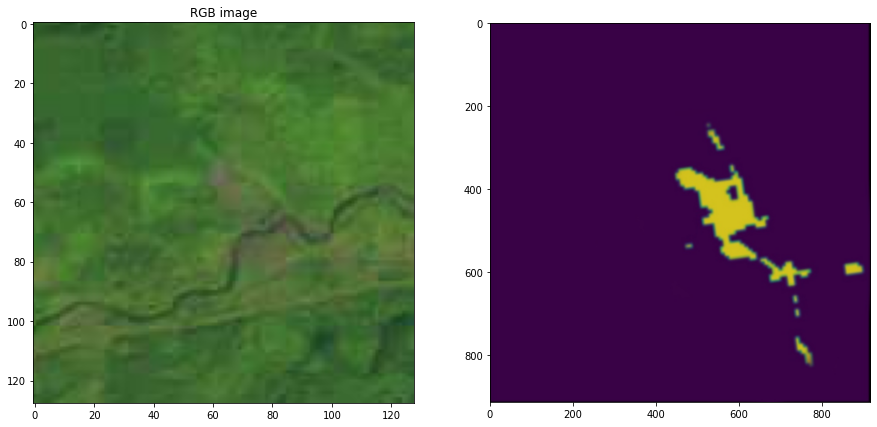

In [20]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.set_title("RGB image")    
ax10.set_title("Predicted_Mask")

ax1.imshow(rgb1)
ax2.imshow(pred_img11)

In [25]:
num_ones = np.count_nonzero(pred_img11)
print("Landslide Susceptible Pixels", num_ones)
area = (num_ones*10*10)/(1000*1000)
print("The landslide cover area :", area, "square kilometer")
predicted_value = area;actual_value = 0.0607
accuracy = (1 - abs(predicted_value - actual_value) / actual_value) * 100
print("Accuracy is %.2f%%"%(accuracy))

Landslide Susceptible Pixels 648
The landslide cover area : 0.0648 square kilometer
Accuracy is 93.25%


In [22]:
array = pred_img11
threshold = (array.min() + array.max()) / 2

total_value_count = np.prod(array.shape)
high_value_count  = np.sum(array > threshold) 
low_value_count   = total_value_count - high_value_count

high_low_ratio = (high_value_count / low_value_count)
high_all_ratio = (high_value_count / total_value_count)
low_all_ratio  = (low_value_count  / total_value_count)

print(f"Ratio of yellow region over purple region {high_low_ratio*100:.3f}%")
print(f"Ratio of yellow region over total {high_all_ratio*100:.3f}%")
print(f"Ratio of purple region over total {low_all_ratio*100:.3f}%")

Ratio of yellow region over purple region 1.976%
Ratio of yellow region over total 1.938%
Ratio of purple region over total 98.062%
